# Correlation

It is useful when looking at data to see if the way in which some data changes as a function of some parameter, if it also "correlates" with a change in some other parameter, meaning that there is a change in the same direction.

Let's start with some datapoints. We'll generate these ourselves from a normal/gaussian distribution, and calculate a correlation coefficient.

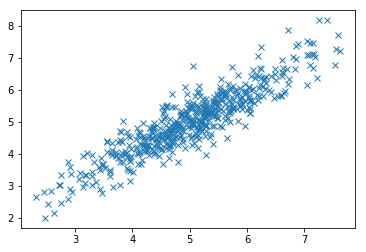

In [14]:
import numpy
import os
import matplotlib.pyplot as plt

covariance = [[1.0,0.9],
              [0.9,1.0]]
mean = [5.0,5.0]

samples = 500

samples = [numpy.random.multivariate_normal(mean,covariance) for i in range(samples)]
samples = numpy.array(samples)
plt.plot(samples[:,0],samples[:,1],'x')
plt.show()

# Pearson Correlation Co-efficient

The pearson correlation co-efficient is the canonical measure for correlation, and is defined as:

$$ \rho_{X,Y} = corr\big(X,Y\big) = \frac{cov\big(X,Y\big)}{\sigma_x \sigma_y} $$

## Covariance

Whilst variance and co-variance will be considered in much more detail in a later notebook, for completion here, it is necessary to define it:

$$ cov\big(X,Y\big) = \mathop{\mathbb{E}}\big[X - \bar{X}\big]\mathop{\mathbb{E}}\big[Y - \bar{Y}\big] = 
\frac{\Sigma^N_{i}\big[X_i - \bar{X}\big]\big[Y_i - \bar{Y}\big]}{N}$$

## Variance

Variance is merely the covariance of some parameter, say $X$, with itself using the above formula.

With this in mind we can calculate the pearson co-efficient for our above data.

In [16]:
# Whilst we know our variances and covariances as we defined them above
# We will calculate them for demonstration.

# numpy.cov does the same thing
def covariancef(X,Y,N):
    X_mean = numpy.mean(X)
    Y_mean = numpy.mean(Y)
    sum = 0.0
    for x,y in zip(X,Y):
        sum += (x - X_mean)*(y - Y_mean)
    return sum/N

def pearson_correlation_coefficient(cov,stddev_x,stddev_y):
    return cov/(stddev_x * stddev_y)

cov_samp = covariancef(samples[:,0],samples[:,1],len(samples))
var_samp_x = covariancef(samples[:,0],samples[:,0],len(samples))
var_samp_y = covariancef(samples[:,1],samples[:,1],len(samples))
stddev_x = numpy.sqrt(var_samp_x)
stddev_y = numpy.sqrt(var_samp_y)

pcc = pearson_correlation_coefficient(cov_samp,stddev_x,stddev_y)
print(pcc)

0.908504021374


# Interpreting Correlation

Interpreting the correlation coefficient is very heuristical and undefined, however some general rules of thumb to keep in mind:

    - Gaussianity of data. The PCC only describes data very well for certain distributions, of which a gaussian is the most common.
    - Correlation isn't causation. Just because two things are connected does not mean that one causes the other. This can be rationaled with simple logic.
    
With these two (there are more) gotchas in mind, generally a co-efficient exceeding either $\pm 0.5$ indicates a significant positive or negative correlation between the data components being measured.

A correlation matrix can also be formed which is related to the covariance matrix, discussed in a later notebook.